In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from presc.conditional_feature_distribution.conditional_feature_distribution import *



In [2]:
# Set up the test dataset wine quality
dataset = pd.read_csv("../../datasets/winequality.csv")
dataset = dataset.drop(columns=["quality"])


In [3]:
# wine dataset
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5806, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel="linear", decision_function_shape="ovr", class_weight="balanced")
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)

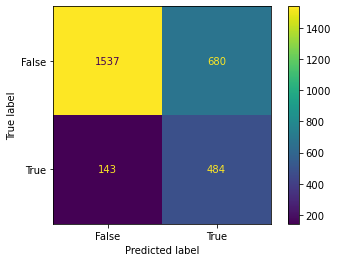

In [4]:
plot_confusion_matrix(classifier, X_test_scaled, y_test)

2762    3.24
42      3.13
2125    3.20
2154    3.12
1013    3.19
        ... 
585     2.86
4238    3.14
603     2.97
1727    3.48
4001    3.00
Name: pH, Length: 1537, dtype: float64
35


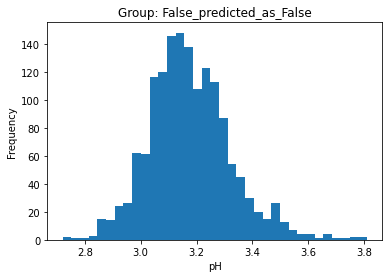

1457    3.25
3957    3.11
3842    2.97
4684    3.44
4476    3.11
        ... 
3939    3.21
4747    3.23
3154    3.27
1735    3.29
360     3.28
Name: pH, Length: 680, dtype: float64
22


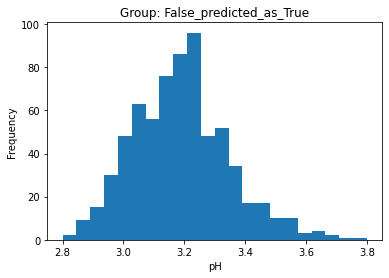

2586    3.00
507     3.64
4162    2.90
584     3.42
651     3.07
        ... 
2210    3.18
715     3.49
1854    3.29
855     3.49
1346    3.21
Name: pH, Length: 143, dtype: float64
10


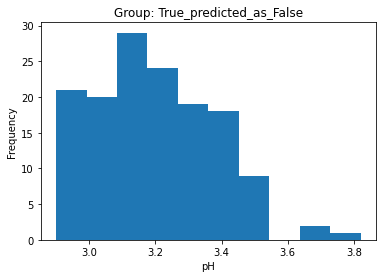

1419    3.07
3664    3.27
1248    3.32
3286    3.06
1464    3.16
        ... 
3477    3.05
2627    3.37
3624    3.19
3779    3.20
689     3.26
Name: pH, Length: 484, dtype: float64
18


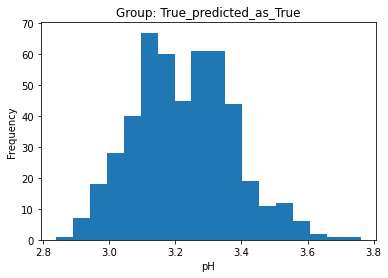

In [5]:
plot_all_histogram_conditional_feature_distribution(y_predict= y_predicted, feature_column= X_test.pH, y_actual= y_test)

In [6]:
# now try the vehicles dataset that is 4 x 4


dataset = pd.read_csv("../../datasets/vehicles.csv")

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel='linear', decision_function_shape='ovo')
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)


222    198
266    183
727    206
412    184
643    198
      ... 
6      204
418    187
104    191
302    204
638    200
Name: HOLLOWS_RATIO, Length: 78, dtype: int64
4


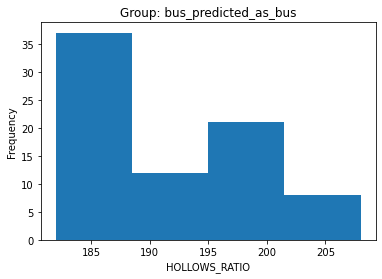

794    195
416    199
747    184
Name: HOLLOWS_RATIO, dtype: int64
2


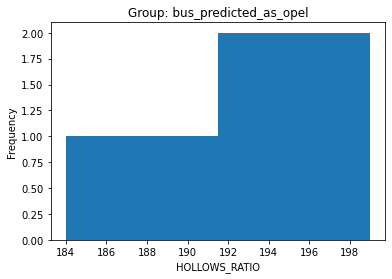

127    191
Name: HOLLOWS_RATIO, dtype: int64


ValueError: cannot convert float NaN to integer

In [7]:
plot_all_histogram_conditional_feature_distribution(y_predict= y_predicted, feature_column= X_test["HOLLOWS_RATIO"], y_actual= y_test)